# Project: Investigate a Dataset of Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. <br>
● ‘ScheduledDay’ tells us on what day the patient set up their appointment. <br>
● ‘Neighborhood’ indicates the location of the hospital. <br>
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>

The goal of this investigation is to study the trends among people who don't show up at their scheduled appointments. <br>
To do so we will focus on answering some questions like: <br>
1) What is the Overall Show Vs No-Show Percentage? <br>
2) What is the correlation between Age and No-show columns? <br>
3) What is the correlation between Gender and No-show columns? <br>
4) Does receiving an SMS affect commitment to the appointments? <br>
4) Does having a scolarship affect commitment to the appointments? <br>

In [46]:
# Import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### Data Summary

In [47]:
# Loading data and printing out a few lines. 
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [48]:
# Taking a look at the shape to know the exact number of patients data collected
df.shape

(110527, 14)

In [49]:
# Getting some insight from a summary statistic
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### From this summary we can see that about 75% of patients don't suffer from Hipertension, Diabetes, Alcoholism or Handcap. And that most of the patients don't have a Scholarship. And about only 32% of the patients received an SMS. 

In [50]:
# Checking data types and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Luckily, we don't have any missing values in our dataset 

## Data Cleaning 
1- Checking for and removing Duplicates. <br>
2- Dropping Columns that we won't need in our study (such as Patient ID and Appointment ID). <br>
3- Checking for and removing any illogical data (such as zero or negative age). <br> 

In [51]:
# Checking for Duplicate Rows and dropping them if found.
df.duplicated().sum()

0

#### Luckily, our data has no duplicates. 

In [53]:
df.drop(['PatientId','AppointmentID'], axis = 1, inplace = True)

In [8]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Checking for Zero or Negative Age.
df[df["Age"] <= 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,M,2016-04-29T10:37:02Z,2016-04-29T00:00:00Z,0,MONTE BELO,0,0,0,0,0,0,No
101,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
104,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,M,2016-04-29T13:43:34Z,2016-04-29T00:00:00Z,0,ITARARÉ,0,0,0,0,0,0,No


### We found 3,540 patients with zero or negative ages. We need to fix that by replacing those numbers with 1 to make more sense.

In [62]:
df.loc[df['Age'] <= 0, 'Age'] = 1

#### We found some Values in "Handcap" coulmns which were greater than 1. We will change those values to 1  to make more sense.

In [85]:
df[df["Handcap"] > 1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
2213,F,2016-04-29T11:22:50Z,2016-04-29T00:00:00Z,29,VILA RUBIM,0,0,0,0,2,0,No
2214,M,2016-04-29T11:22:20Z,2016-04-29T00:00:00Z,55,DO QUADRO,0,0,0,0,3,0,No
2673,M,2016-04-15T13:06:05Z,2016-04-29T00:00:00Z,17,SANTA TEREZA,0,0,0,0,2,1,No
5424,M,2016-05-02T13:24:36Z,2016-05-04T00:00:00Z,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes
5467,F,2016-05-12T09:10:28Z,2016-05-16T00:00:00Z,10,BENTO FERREIRA,0,0,0,0,2,0,No


In [91]:
df.loc[df['Handcap'] > 1, 'Handcap'] = 1

### To deal better with "No-show" column we need to convert its values from "yes" and "no" to "1" and "0".

In [92]:
dummy = pd.get_dummies(df["No-show"])
dummy.head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [93]:
df2 = pd.concat((df,dummy), axis = 1)
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No,Yes
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [94]:
df2.rename(columns = {"No": "show_numeric"} , inplace = True )
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,show_numeric,Yes
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [95]:
df2.drop(["Yes"], axis =1, inplace = True)

In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
show_numeric      110527 non-null uint8
dtypes: int64(7), object(5), uint8(1)
memory usage: 10.2+ MB


In [97]:
df2.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,show_numeric
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


<a id='eda'></a>
## Exploratory Data Analysis

##### Now, we will look deeper into the data with visual plots to gain insights about the different types of patients data gathered and their percentages. Then we will take a look at the correlation between each parameter and no show rate.


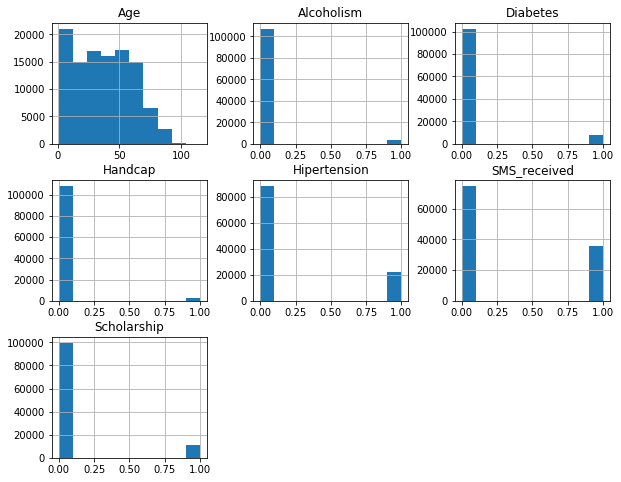

In [98]:
# Taking a general look at the histogram of the whole data.
df.hist(figsize = (10,8));

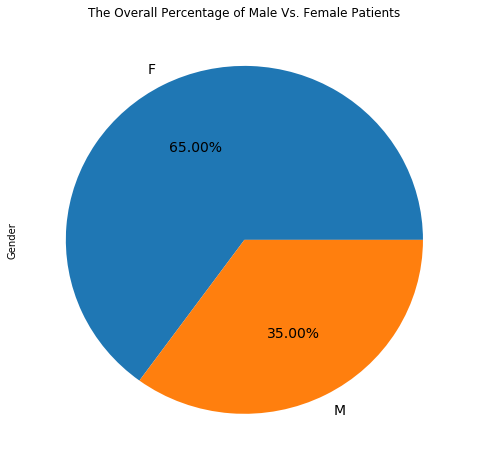

In [157]:
df2.Gender.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8), fontsize = 14, title ='The Overall Percentage of Male Vs. Female Patients' );

##### Generally, there are more female patients in the gathered dataset. 

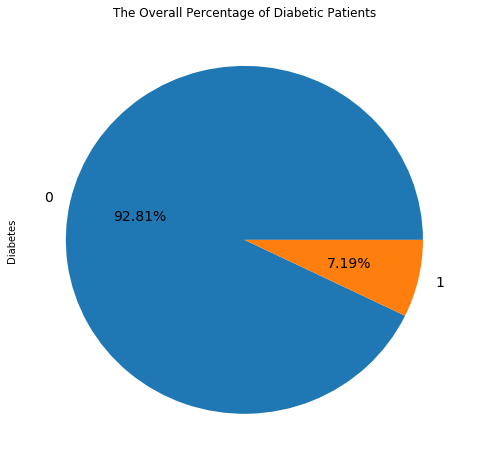

In [158]:
df2.Diabetes.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8), fontsize = 14, title ='The Overall Percentage of Diabetic Patients' );

##### Only 7.19% of the patients are diabetic.

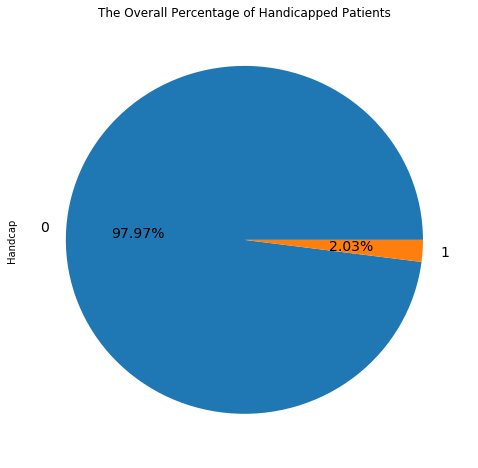

In [159]:
df2.Handcap.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8), fontsize = 14, title = "The Overall Percentage of Handicapped Patients");

##### Only 2% of patients are Handicapped.

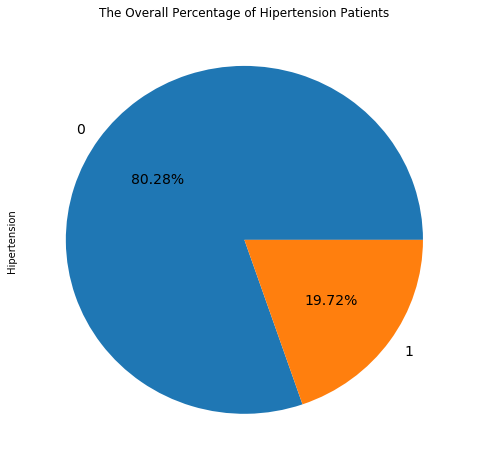

In [160]:
df2.Hipertension.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8), fontsize = 14, title = "The Overall Percentage of Hipertension Patients");

##### About 19.7% of patients suffer from Hypertension.

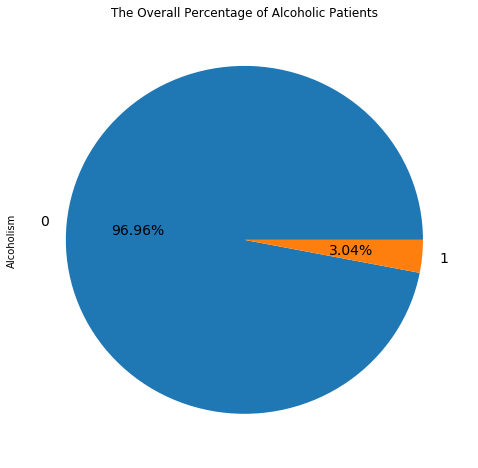

In [161]:
df2.Alcoholism.value_counts().plot(kind= 'pie', autopct='%.2f%%', figsize=(8,8), fontsize = 14, title = "The Overall Percentage of Alcoholic Patients");

##### And Finally, only 3% are alcoholic.

### The Overall Show Vs No-Show Percentage.

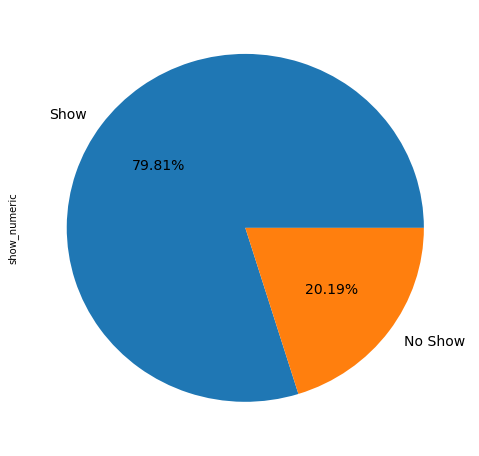

In [162]:
df2.show_numeric.value_counts().plot(kind= 'pie', autopct='%.2f%%', labels = ["Show", "No Show"], figsize=(8,8), fontsize = 14);

##### About 20% of patients don't show up at their scheduled appointments.

### The Correlation between Age and No-Show rate.

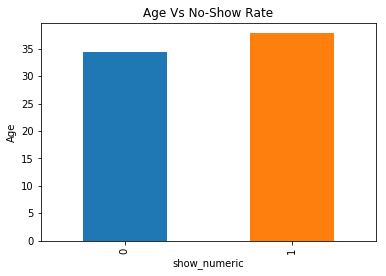

In [164]:
df2.groupby("show_numeric")["Age"].mean().plot(kind = "bar", title = "Age Vs No-Show Rate" );
plt.ylabel("Age");

#### Obviously, the average age in both show and no show cases is between 35 and 40. which means that age has no significant effect on commitment to scheduled appointments.

### The Correlation between Gender and No-Show rate.

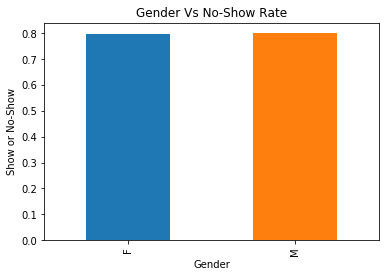

In [165]:
df2.groupby("Gender")["show_numeric"].mean().plot(kind = "bar", title = "Gender Vs No-Show Rate" );
plt.ylabel("Show or No-Show");

#### Also patient's gender doesn't seem to have any effect on commitment to scheduled appointments.

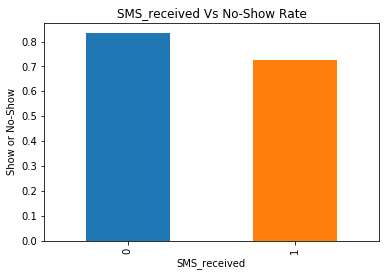

In [167]:
df2.groupby("SMS_received")["show_numeric"].mean().plot(kind = "bar", title = "SMS_received Vs No-Show Rate" );
plt.ylabel("Show or No-Show");

#### Here, we would suspect that receiving an SMS should have a higher impact on no show rates. On the contrary, a higher percentage of people who did not receive an SMS showed up at their scheduled appointments more than those who received an SMS.

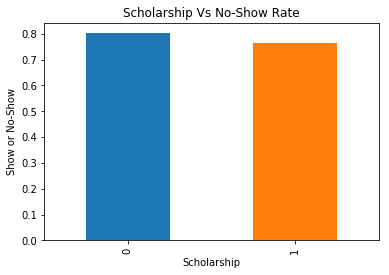

In [168]:
df2.groupby("Scholarship")["show_numeric"].mean().plot(kind = "bar", title = "Scholarship Vs No-Show Rate" );
plt.ylabel("Show or No-Show");

#### Also, we would suspect that having a Scholarship should have a higher impact on no show rates. On the contrary, a higher percentage of people who do not have a Scholarship showed up at their scheduled appointments more than those who don't.

### Now, we will investigate the correlation between having a chronic condition and no-show rate.

In [202]:
def chronic_correlation(df, chronic_disease, plot_title):
    df2.groupby("show_numeric")[chronic_disease].mean().plot(kind = "bar", title = plot_title )
    plt.legend(["No-Show"])
    plt.ylabel("Show or No-Show")

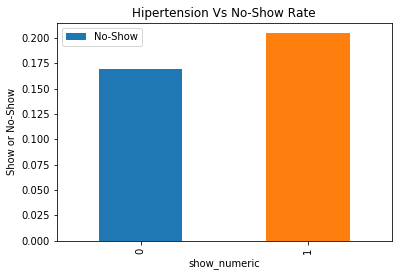

In [203]:
chronic_correlation(df2, "Hipertension", "Hipertension Vs No-Show Rate")

#### From this graph we can conclude that patients who suffer from Hipertension have a higher tendency to show up on their scheduled appointments.

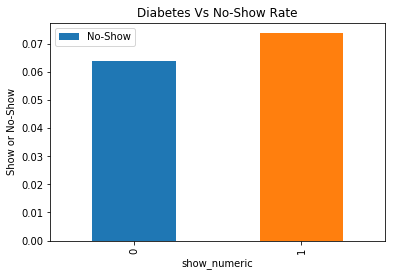

In [206]:
chronic_correlation(df2, "Diabetes", "Diabetes Vs No-Show Rate")

#### Also, from this graph we can conclude that patients who suffer from Diabetes have a higher tendency to show up on their scheduled appointments.

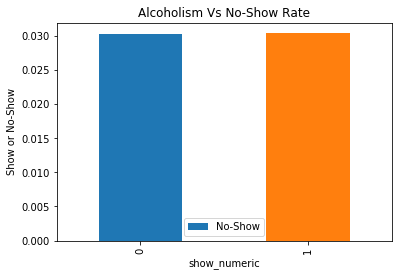

In [207]:
chronic_correlation(df2, "Alcoholism", "Alcoholism Vs No-Show Rate")

#### From this graph we can see that alcoholism has no effect on commitment to scheduled appointments.

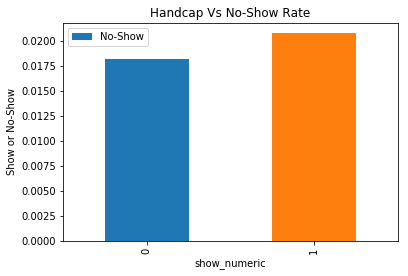

In [209]:
chronic_correlation(df2, "Handcap", "Handcap Vs No-Show Rate")

#### Also, from this graph we can conclude that Handicapped patients have a higher tendency to show up on their scheduled appointments.

## <a id='conclusions'></a>
## Conclusions
### From the above study, we can conclude the following:

#### 1- The overall percentage of show to no-show rate is 80% - 20%. <br>
#### 2- The overall number of female patients is more than male patients. However, gender has no impact on commitment.
#### 3- There's about 7.19% diabetic patients, 3% Alcoholic, 2% Handicapped and 20% suffer from Hypertension.
#### 4- Having a scholarship and receiving an SMS message as a reminder although seem encouraging but don't have a positive impact on commitment. 
#### 5- Suffering from chronic illness such as diabetes, handcap or hypertension results in more commitment to scheduled appointments. Howevere, being Alcoholic has no impact at all.

### Limitations:

#### 1- The analysis does not state or imply that one change causes another based solely on a correlation.
#### 2- Age Column had -1 and 0 values which I rounded up to be 1.
#### 3- Handcap Column had 2,3 and 4 values which appeared while plotting the correlation between Handcap and no show rate. I  replaced them all with 1 to make more sense.
#### 4- The initial non numeric no-show values were hard to deal with inplotting, so I had to change them to numeric.
#### 5- Many of the data was categorical which made it more challenging to be analyzed. 




In [210]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0